In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from statistics import median
%matplotlib inline
import os

In [2]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

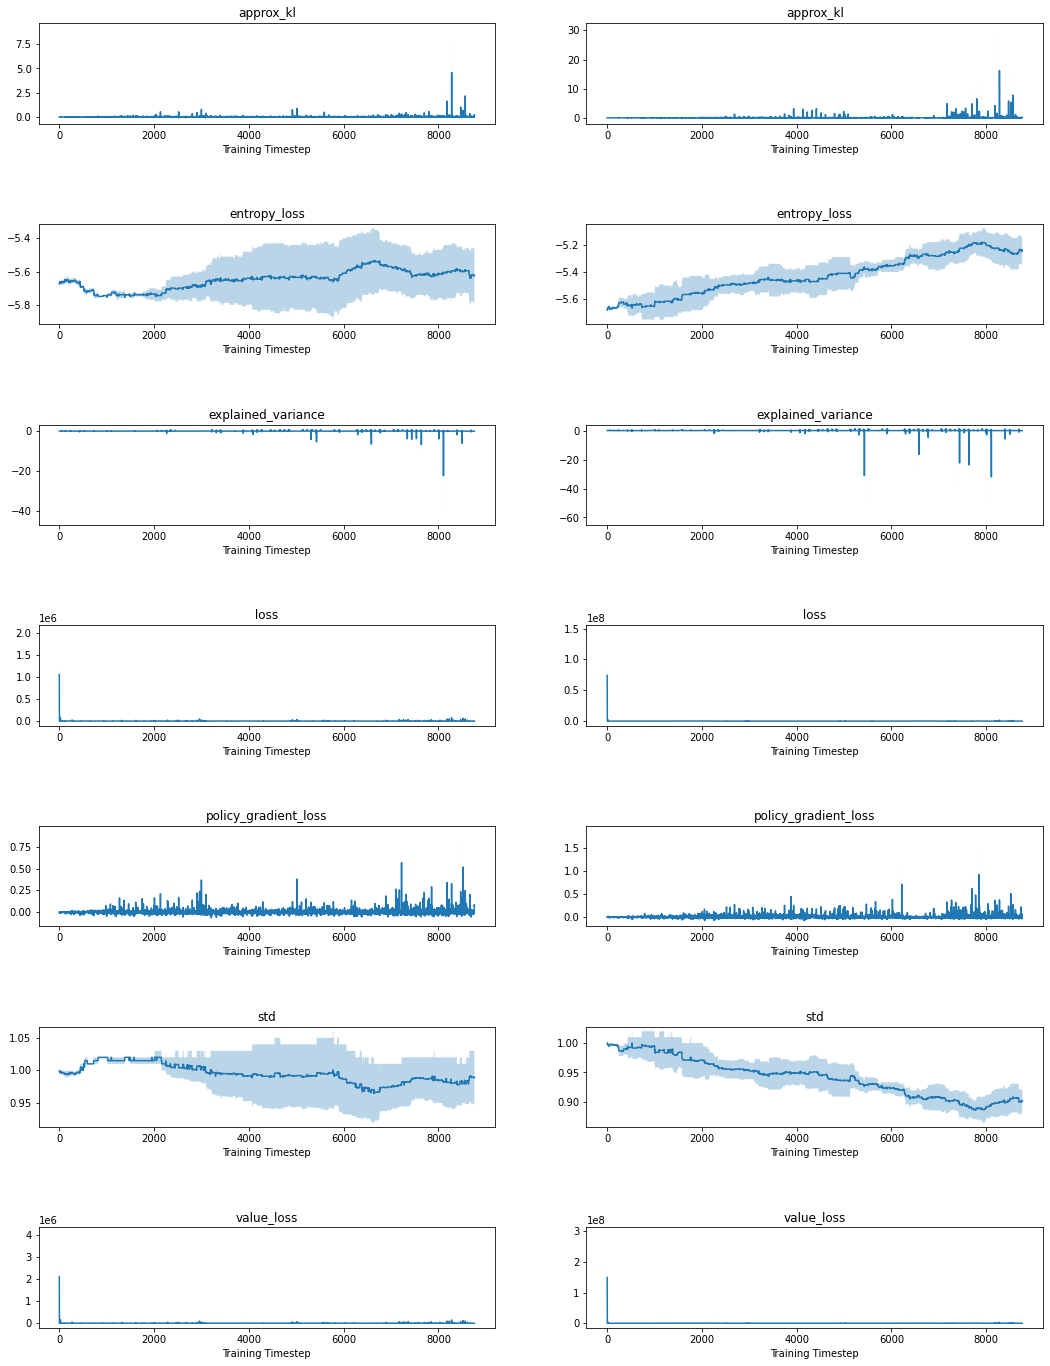

In [22]:
# files = ['1_houses.out', '2_houses.out', '5_houses.out', '10_houses.out', 'rl25_c2_reducedss.out']
files = ['gae02_v2_part2.out', 'cubic.out']
name = 'cubic'
bs = [0.0001,0.01]
training_values = {'approx_kl':[], 
     'entropy_loss':[],  
     'explained_variance':[], 
     ' loss ':[],
     'policy_gradient_loss':[],
     'std':[],
     'value_loss':[]}

fig, ax = plt.subplots(len(list(training_values.keys())), len(files), figsize=(18,24))

q = 0
for j in range(len(files)):
    item = os.path.join('outputs',files[j])
    
    training_values = {'approx_kl':[], 
     'entropy_loss':[],  
     'explained_variance':[], 
     ' loss ':[],
     'policy_gradient_loss':[],
     'std':[],
     'value_loss':[]}

    with open(item, 'rt') as file:
        for line in file:
            for key in training_values:
                if key in line:
                    for word in line.split():
                        try:
                            val = float(word)
                            training_values[key] += [val]
                        except:
                            pass

    # Function to plot
    for i in range(len(list(training_values.keys()))):
        key = list(training_values.keys())[i]
        y = training_values[key][::2][:8760]
        z = training_values[key][1::2][:8760]
        q = 0.5*(np.array(y) + np.array(z)[:len(y)])
        x = np.arange(len(y))
        w = np.arange(len(z))
#         y = np.mean
        ax[i][j].set_title(f"{key}")
        ax[i][j].set_xlabel("Training Timestep")
        
#         if key == 'explained_variance':
#             ax[i][j].set_title("Explained Variance")
#             y = np.clip(y, -10,10)
#             z = np.clip(z, -10,10)
#             q = np.clip(z,-10,10)
            
# #             y = movingaverage(y,300)
# #             z = movingaverage(z,300)
#             q = movingaverage(q,300)
#             ax[i][j].set_ylim(-1,2)
        
#         elif not key == 'entropy_loss':
#             q = movingaverage(q,300)
#         if key == 'entropy_loss':
#             ax[i][j].set_title("Entropy Loss")
# #             y = movingaverage(y,300)
# #             z = movingaverage(z,300)
#             q = movingaverage(q,300)
            
        minimum = np.minimum(y,z)
        maximum = np.maximum(y,z)
        ax[i][j].fill_between(x,minimum,maximum, alpha=0.3)
        ax[i][j].plot(x, q)
#         ax[i][j].plot(w, z) 
#         ax[i][j].legend(["Group A", "Group B"])
    #     mymodel = np.poly1d(np.polyfit(x, y, 3))
    #     ax[i].plot(x, mymodel(x))

        
            
    q += 1

    plt.subplots_adjust(hspace = 1)
plt.savefig(f'outputs/{name}.png') 

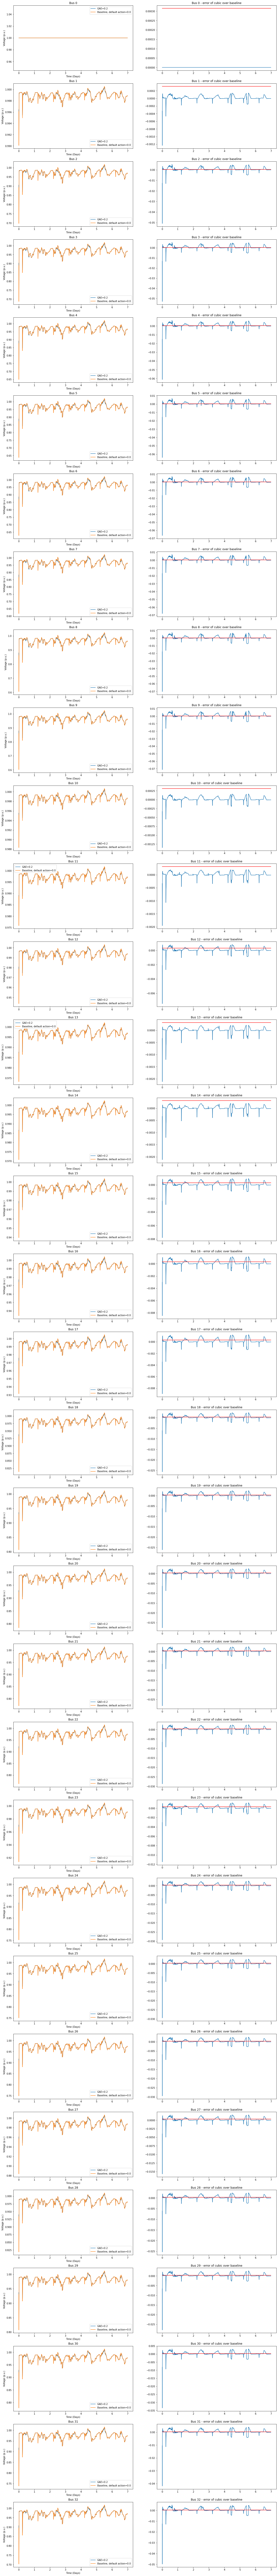

In [21]:
files = ['cubic', 'baseline']#, 'gae02_2', 'new_baseline2']
legend = ['GAE=0.2', 'Baseline, default action=0.0']#, 'GAE=0.2, default=1.0', 'Baseline, default=1.0']
# clr = ['b','r','g']
fig, ax = plt.subplots(33,2 ,figsize=(20,200))
diff = []
x = np.arange(1344) / 24 / 4 / 2
for file in files:
#     c = clr.pop()
    data = np.genfromtxt(f'models/{file}/voltage.csv', delimiter=',')
    diff += [data]
    for i in range(33):
        ax[i][0].plot(x, data[:,i])
        ax[i][0].legend(legend)
        ax[i][0].set_xlabel("Time (Days)")
        ax[i][0].set_ylabel("Voltage (p.u.)")
        ax[i][0].set_title(f"Bus {i}")
# c = clr.pop()
for i in range(33):
    ax[i][1].plot(x, abs(diff[0][:,i]-1)-abs(diff[1][:,i]-1))
#     ax[i][1].plot(x, abs(diff[0][:,i]-1)-abs(diff[2][:,i]-1))
    mean = np.mean(abs(diff[0]-1)-abs(diff[1]-1))
    c = 'r' if 1000*mean >= 0 else 'g'
    ax[i][1].plot(x, np.ones(len(x))*mean, color=c)
    ax[i][1].set_title(f"Bus {i} - error of {files[0]} over {files[1]}")
    #ax[i][1].legend(['default action=0.0', 'default action=1.0'])
    

plt.savefig(f'models/{files[0]}/comp_to_baseline')
plt.show()

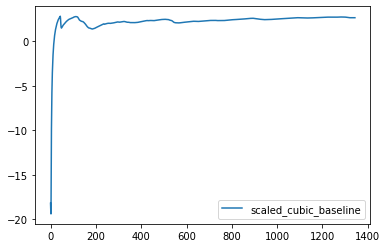

In [29]:
files = ['scaled_cubic_baseline']
rewards = []
for file in files:
    reward = np.genfromtxt(f'models/{file}/reward.csv', delimiter=',')
    plt.plot(np.arange(len(reward)), np.divide(np.cumsum(reward), np.arange(len(reward))+1))
    rewards += [sum(reward)]
    
plt.legend(files)

In [24]:
print(f'{-100*np.round((rewards[0]-rewards[1])/rewards[1],3)}% improvement over baseline')

IndexError: list index out of range